In [7]:
import gym
import numpy as np
env = gym.make('FrozenLake-v1', desc=None,map_name="4x4", is_slippery=True)
gamma = 0.9

#Obtaining environment details 
# print('Number of Actions', env.action_space.n) 
# print('Number of States ', env.observation_space.n)
# print('P[10,2]', env.P[10][2])

%matplotlib inline
import seaborn
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
def fancy_visual(value_func,policy_int):    
    grid = 4    
    f, ax = plt.subplots(figsize=(11, 9))
    cmap = seaborn.diverging_palette(220, 10, as_cmap=True)
    reshaped = np.reshape(value_func,(grid,grid))
    seaborn.heatmap(reshaped, cmap="icefire",vmax=1.1, robust = True,
                square=True, xticklabels=grid+1, yticklabels=grid+1,
                linewidths=.5, cbar_kws={"shrink": .5}, ax=ax, annot=True, fmt="f")
    counter = 0
    for j in range(0, 4):
        for i in range(0, 4):
            if int(policy_int[counter]) == 1:
                plt.text(i+0.5, j+0.7, u'\u2193', fontsize=12)
            elif int(policy_int[counter]) == 3:
                plt.text(i+0.5, j+0.7, u'\u2191', fontsize=12)
            elif int(policy_int[counter]) == 0:
                plt.text(i+0.5, j+0.7, u'\u2190', fontsize=12)
            else:
                plt.text(i+0.5, j+0.7, u'\u2192', fontsize=12)
            counter=counter+1

    plt.title('Heatmap of value iteration with value function values and directions')
#     print('Value Function',value_func)
#     print('Policy',policy_int)
#     plt.show()

test_value = np.random.rand(16) #Random Value Function (only for plotting)
test_policy = np.random.randint(0,3,16) #Random Policy (only for plotting)
# fancy_visual(test_value,test_policy)

In [11]:

maximum_itr=100

V=[0]*env.observation_space.n
policy=[0]*env.observation_space.n
Q=[]
diff=[]
norm=[]

for i in range(maximum_itr):
    v_old=V.copy()
    for s in range(env.observation_space.n):
        
        temp_arr=[]
        for a in range(env.action_space.n):
            temp=0
            for prob,nex_s,reward,_ in env.P[s][a]:
                temp+=prob*(reward+(gamma*V[nex_s]))
            temp_arr.append(temp)
        V[s]=max(temp_arr)  
    norm.append(np.linalg.norm(np.subtract(np.array(v_old),np.array(V))))
        

for s in range(env.observation_space.n):
    v_current=V[s]
    temp_arr=[]
    for a in range(env.action_space.n):
        temp=0
        for prob,nex_s,reward,_ in env.P[s][a]:
            temp+=prob*(reward+(gamma*V[nex_s]))
        temp_arr.append(temp)
    maxV=max(temp_arr)
    policy[s]=temp_arr.index(maxV)
    Q.append(temp_arr)

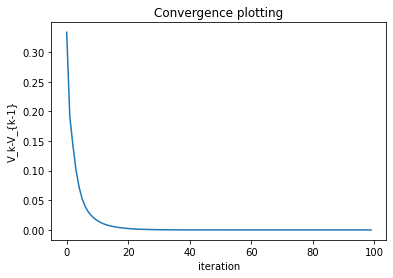

In [12]:
# plotting value V_k-V_(k-1)
plt.plot(range(len(norm)),norm)
plt.xlabel('iteration')
plt.ylabel('V_k-V_{k-1}')
plt.title('Convergence plotting')
plt.show()

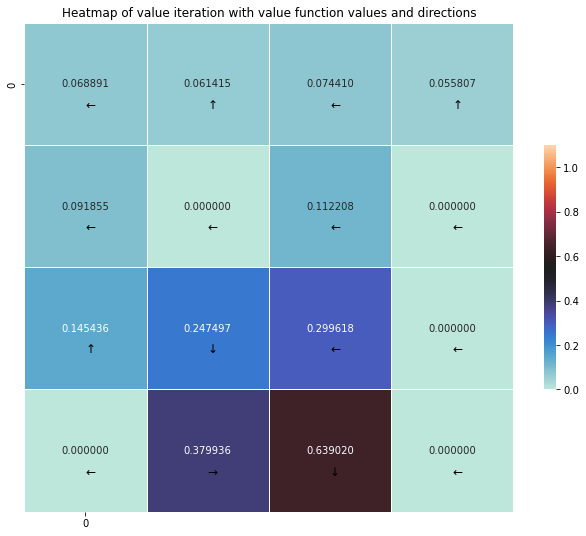

In [13]:
# plotting heat map
fancy_visual(V,policy)
plt.show()

In [14]:
print('value function:',V)    
print('policy:',policy)

print('Optimal Q value:',Q)

value function: [0.06889090221153518, 0.06141456955986556, 0.07440976074513851, 0.0558073201518834, 0.09185453780109842, 0.0, 0.11220820587305598, 0.0, 0.14543635336555288, 0.24749695383047288, 0.2996175922628151, 0.0, 0.0, 0.37993590067219085, 0.639020147886747, 0.0]
policy: [0, 3, 0, 3, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0]
Optimal Q value: [[0.06889090266725063, 0.06664800287174974, 0.06664800287174974, 0.05975891219488077], [0.03909164153142022, 0.042990198887002104, 0.04074729909150122, 0.06141456975496177], [0.07440976085341801, 0.06882902867544147, 0.07272758603102336, 0.057489495137066235], [0.03906512426910657, 0.03906512426910657, 0.033484392091130036, 0.05580732031467159], [0.09185453801345594, 0.07118726734999539, 0.06429817667312641, 0.04822363200379008], [0.0, 0.0, 0.0, 0.0], [0.11220820590238607, 0.08988527767884452, 0.11220820590238607, 0.022322928223541552], [0.0, 0.0, 0.0, 0.0], [0.07118726734999539, 0.11787999215880772, 0.10180544748947139, 0.14543635349913725], [0.157